<a href="https://colab.research.google.com/github/thegreatfaizan/Face-Anonymization-from-YouTube-Videos/blob/main/Face_Blurring_from_YouTube_Videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will be exploring a project focused on recognizing faces of Imran Khan in YouTube videos and anonymizing them. This project utilizes cutting-edge computer vision and machine learning algorithms to detect faces in a video stream and obscure them with a blur effect. By using pafy and OpenCV, we are able to efficiently process large amounts of video data and ensure the accuracy of our face recognition results. Let's dive into the code and see how we can implement this exciting project!

In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=1232621ecfabd85f1486779c8f9b85886124d89de815d5703d7b722573b4648d
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [2]:
!pip install pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install youtube-dl==2020.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:00


In [4]:
# Creating directory
!mkdir Imran-Khan
!cd Imran-Khan

In [5]:
#Downloading image of Imran Khan and saving to the current directory
import requests
file_url = 'https://images.news18.com/ibnlive/uploads/2021/09/pak-pm-imran-khan-16486488524x3.jpg'
image_file = requests.get(file_url).content
with open('/content/Imran-Khan/imran_khan.jpg','wb') as handler:
  handler.write(image_file)

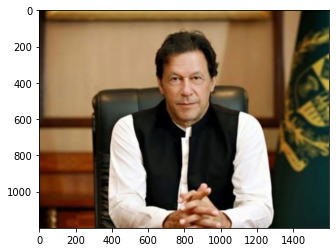

In [6]:
# image preview
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/Imran-Khan/imran_khan.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
#import necessary libraries
import cv2
import face_recognition
import pafy
from google.colab.patches import cv2_imshow

In [8]:
#Downloading YouTube video from the link and saving to the current directory
url = 'https://www.youtube.com/watch?v=O-ffrWfrSRg'
video = pafy.new(url)
best = video.getbest(preftype="mp4")  #returns the quality of type mp4
best.download(filepath="/content/Imran-Khan/video." + best.extension)

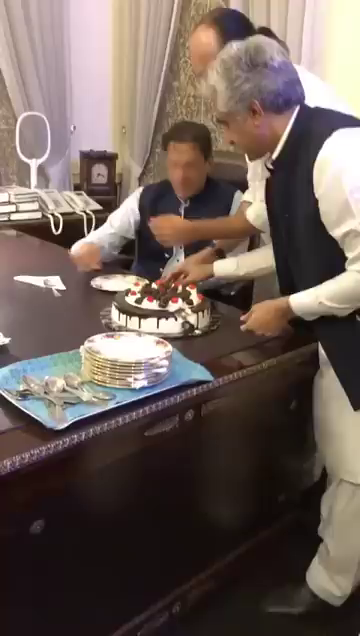

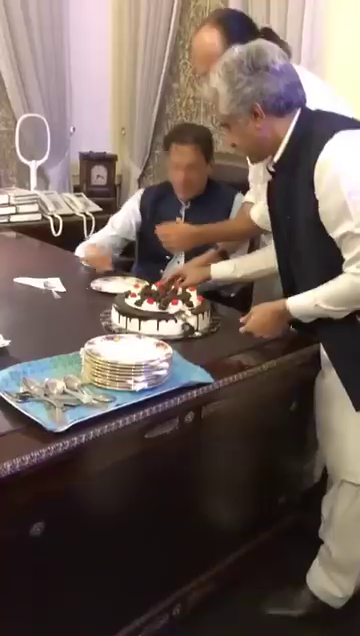

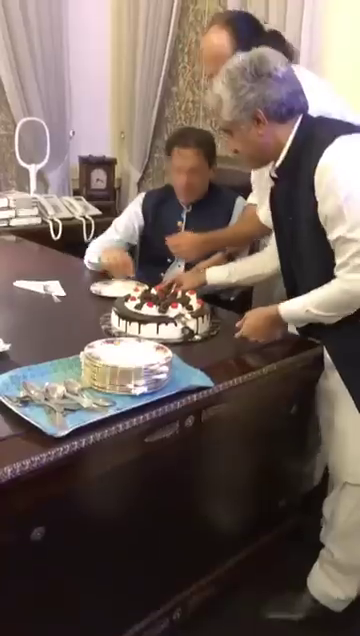

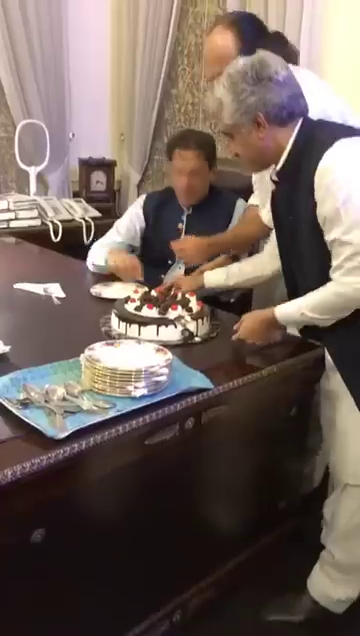

KeyboardInterrupt: ignored

In [9]:
capture = cv2.VideoCapture("/content/Imran-Khan/video.mp4") #Loading downloaded YouTube Video
frame_width = int(capture.get(3))
frame_height = int(capture.get(4))
size = (frame_width,frame_height)
result = cv2.VideoWriter("output.mp4",cv2.VideoWriter_fourcc(*'MP4V'),20,size)  # For writing Output Video

while capture.isOpened():
   success, image = capture.read()  #image = image from video
   image_converted = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
   image_ik = face_recognition.load_image_file('/content/Imran-Khan/imran_khan.jpg')  #image_ik = imran khan image
   image_ik_converted = cv2.cvtColor(image_ik,cv2.COLOR_BGR2RGB)
   try:

    # Face Detection
    image_detected = face_recognition.face_encodings(image_converted)[0]
    image_ik_detected = face_recognition.face_encodings(image_ik_converted)[0]

   except IndexError: # Handling Index out of List Exception
     pass

  # Face Recognition
   results = face_recognition.compare_faces([image_ik_detected], image_detected)  #Matching Imran Khan's Face

   if results[0]:
     location = face_recognition.face_locations(image)
     try:

      # Extraction of Detected Face
      location = location[0]
      face = image[location[0]:location[2],location[3]:location[1]]

      #Applying Median Blur to Extracted Face Image
      face_blur = cv2.medianBlur(face,9)

      # Setting blurred image to the original video image
      image[location[0]:location[2],location[3]:location[1]] = face_blur

      cv2_imshow(image) # Display blurred faces

     except IndexError: #Handling Index list out of range exception
       pass
     result.write(image) # Writing blurred image frames to make output video

capture.release()
result.release()
print("Completed! Output video is at /content/output.mp4 \nDouble Click to download the output video.")